# Regression Task: Predicting Car Fuel Efficiency

## Objective
The goal of this notebook is to predict the fuel efficiency (miles per gallon, MPG) of cars based on their attributes. This regression task is ideal for understanding the impact of **feature scaling** on model performance. We will explore:

1. How to preprocess the dataset, including scaling and handling missing values.
2. Building and evaluating a **Linear Regression** model.
3. Building and evaluating a **Neural Network Regression** model.
4. Analyzing the effect of feature scaling on the performance of these models.

## Dataset: UCI Machine Learning Repository (Auto MPG Dataset)
The dataset contains information about various car models and their attributes, such as:
- **Cylinders**: Number of cylinders in the engine.
- **Displacement**: Engine displacement in cubic inches.
- **Horsepower**: Engine horsepower.
- **Weight**: Vehicle weight in pounds.
- **Acceleration**: Time to accelerate from 0 to 60 mph.
- **Model Year**: Year of manufacture.
- **Origin**: Origin of the car (USA, Europe, Japan).
- **MPG**: Miles per gallon (target variable).

### Key Characteristics
- **Type**: Regression dataset.
- **Samples**: 398 cars.
- **Features**: 7 input features.

### Why Focus on Feature Scaling?
Feature scaling transforms the dataset into a comparable range for all input features, which is crucial for models like Neural Networks. This notebook demonstrates:
1. Models without scaling.
2. Models with Min-Max Scaling and Standardization.

### Tools Used
- **Python Libraries**: pandas, numpy, seaborn, matplotlib, scikit-learn, tensorflow/keras.



# Dataset Overview

The Auto MPG dataset contains information about car specifications and their fuel efficiency. Below are the features:

| Feature       | Description                           | Type    |
|---------------|---------------------------------------|---------|
| MPG           | Miles per gallon (Target variable)    | Numeric |
| Cylinders     | Number of cylinders                   | Numeric |
| Displacement  | Engine displacement (cubic inches)    | Numeric |
| Horsepower    | Engine horsepower                     | Numeric |
| Weight        | Vehicle weight (pounds)               | Numeric |
| Acceleration  | Time to accelerate from 0 to 60 mph   | Numeric |
| Model Year    | Year of manufacture                   | Numeric |
| Origin        | Country of origin (1=USA, 2=EU, 3=JP) | Categorical |

### Key Considerations:
1. **Missing Values**: The `Horsepower` feature has missing values that need to be handled.
2. **Scaling**: Features like `Weight` and `Displacement` have much larger ranges than others, necessitating scaling.
3. **Target Variable**: MPG (Miles per gallon) is our continuous target variable.

### Steps:
1. Load the dataset and inspect its structure.
2. Handle missing values.
3. Explore the data using visualizations.
4. Scale features and split data for training and testing.


In [8]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
sns.color_palette("colorblind")

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

In [9]:
# Load the Auto MPG dataset from seaborn
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
column_names = [
    "MPG", "Cylinders", "Displacement", "Horsepower", "Weight", 
    "Acceleration", "Model Year", "Origin"
]
df = pd.read_csv(url, delim_whitespace=True, names=column_names, na_values="?")

C:\Users\sabih.rehman\AppData\Local\Temp\ipykernel_22732\2670577359.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(url, delim_whitespace=True, names=column_names, na_values="?")


In [10]:
# Display the first few rows of the dataset
print("Dataset Preview:")
df.head()

Dataset Preview:


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [11]:
# Dataset Info
print("\nDataset Information:")
df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Index: 398 entries, 18.0 to 31.0
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    int64  
 1   Cylinders     398 non-null    float64
 2   Displacement  392 non-null    float64
 3   Horsepower    398 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    int64  
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 28.0+ KB


In [12]:
# Check for missing values
print("\nMissing Values:")
df.isnull().sum()


Missing Values:


MPG             0
Cylinders       0
Displacement    6
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

## Correlation Heatmap
- **Objective:** Quantify the strength and direction of linear relationships between features using a correlation matrix.
- **Insights:**
  - Strong negative correlation between `Weight` and `MPG`, indicating that heavier cars consume more fuel.
  - High positive correlation between `Displacement`, `Horsepower`, and `Weight`, which reflects engine and vehicle size dependencies.
  - Weak correlations for features like `Acceleration` with `MPG`, suggesting limited influence.

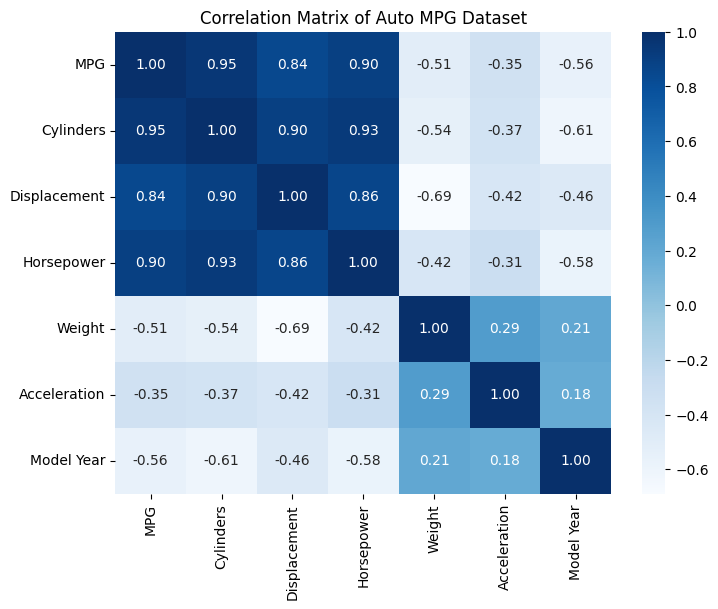

In [13]:
# Filter numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='Blues', fmt=".2f")
plt.title("Correlation Matrix of Auto MPG Dataset")
plt.show()


# Data Preprocessing

## Handling Missing Values
The `Horsepower` column contains missing values, represented as `NaN`. We handle them as follows:
- Replace missing values with the **median** of the column to avoid introducing bias.

## Encoding Categorical Data
The `Origin` column is a categorical feature. We will encode it using **one-hot encoding**, creating three separate columns for the countries of origin.

## Splitting the Data
We split the dataset into:
- **Features (`X`)**: All columns except `MPG`.
- **Target (`y`)**: The `MPG` column.

## Feature Scaling
We apply two types of scaling:
1. **Min-Max Scaling**: Scales features to a range of 0 to 1.
2. **Standardization**: Scales features to have a mean of 0 and a standard deviation of 1.

Each scaling method is evaluated separately to analyze its effect on model performance.


In [14]:
# Handling missing values: Replacing NaN in Horsepower with the median to avoid bias
df['Displacement'] = df['Displacement'].fillna(df['Displacement'].median())


In [15]:
# One-hot encoding for the 'Origin' column
df = pd.get_dummies(df, columns=['Origin'], prefix='Origin')

In [16]:
# Splitting features and target
X = df.drop(columns=['MPG'])
y = df['MPG']


In [17]:
# Splitting into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
# Scaling features
scalers = {
    "MinMaxScaler": MinMaxScaler(),
    "StandardScaler": StandardScaler()
}

# Apply scaling methods
scaled_data = {}
for scaler_name, scaler in scalers.items():
    scaled_X_train = scaler.fit_transform(X_train)
    scaled_X_test = scaler.transform(X_test)
    scaled_data[scaler_name] = (scaled_X_train, scaled_X_test)

# Impact of Feature Scaling on Data Distribution

## Objective
Scaling features ensures they are on a comparable range, which is critical for algorithms sensitive to feature magnitudes (e.g., neural networks). Here, we compare:
1. **Original Data (Unscaled):** Features are in their raw forms, often with different ranges and units.
2. **Scaled Data (MinMax Scaling):** Features are transformed to a range of 0 to 1, preserving relative relationships but standardizing magnitudes.

## Insights
- Large-range features like `Weight` and `Displacement` dominate the raw dataset, potentially leading to biases in models.
- After scaling, all features lie within the same range (0 to 1), enabling fairer contributions during model training.
- Visualizing the distributions before and after scaling highlights how MinMax scaling transforms the data without distorting its shape.


C:\Users\sabih.rehman\AppData\Local\Temp\ipykernel_22732\2284538198.py:13: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.tight_layout()


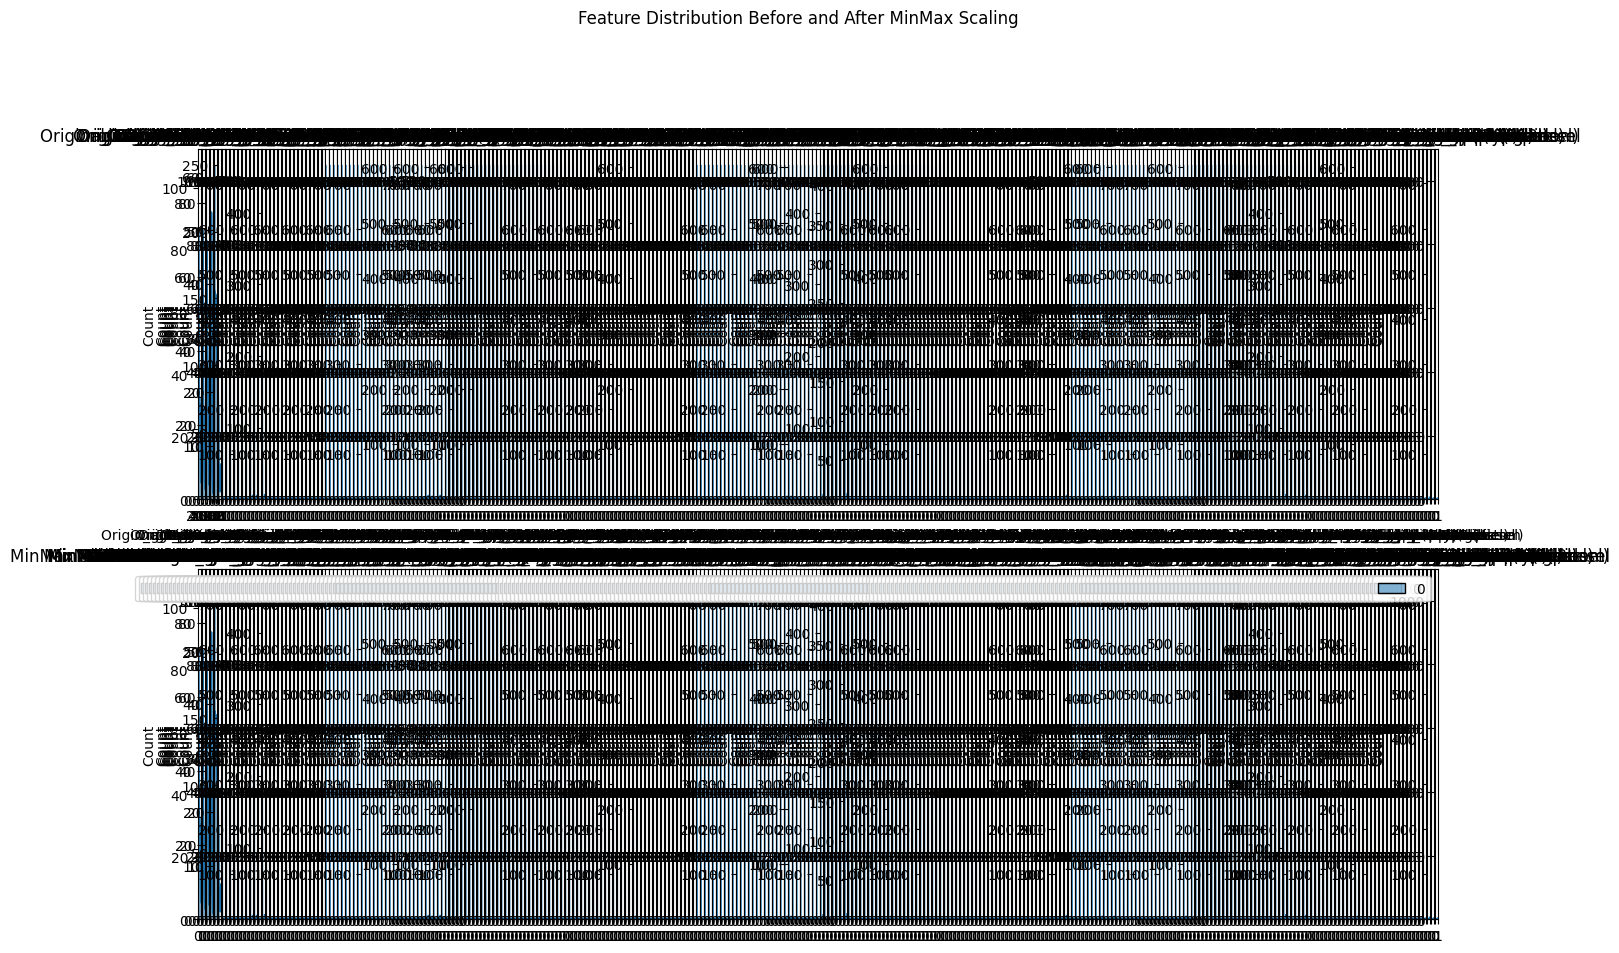

In [19]:
# Visualizing the impact of scaling on features
fig, axes = plt.subplots(2, len(X.columns), figsize=(16, 10))

for i, column in enumerate(X.columns):
    # Original data (unscaled)
    sns.histplot(X[column], kde=True, ax=axes[0, i])
    axes[0, i].set_title(f"Original: {column}")

    # MinMax scaled data
    sns.histplot(scalers["MinMaxScaler"].fit_transform(X[[column]]), kde=True, ax=axes[1, i])
    axes[1, i].set_title(f"MinMax Scaled: {column}")

fig.tight_layout()
plt.suptitle("Feature Distribution Before and After MinMax Scaling", y=1.02)
plt.show()


# Model Building

We will build and evaluate the following regression models:
1. **Linear Regression**:
   - Baseline model to evaluate performance with and without feature scaling.
   - Metrics: Mean Squared Error (MSE) and R-squared (R²).

2. **Neural Network Regression**:
   - Multi-layer perceptron with one hidden layer.
   - Metrics: Mean Squared Error (MSE) and R-squared (R²).

## Steps:
1. Train models on the unscaled and scaled data.
2. Compare performance metrics to understand the impact of scaling.
3. Visualize predictions vs. actual values.


In [20]:
# Linear Regression
def evaluate_linear_regression(X_train, X_test, y_train, y_test):
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2

In [21]:
# Neural Network Regression

# Neural network architecture:
# - Input layer matches the number of features.
# - Two hidden layers (64 and 32 nodes) for capturing non-linear relationships.
# - Output layer predicts the continuous MPG value.

def evaluate_neural_network(X_train, X_test, y_train, y_test):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(32, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    model.fit(X_train, y_train, epochs=50, verbose=0, batch_size=16)
    y_pred = model.predict(X_test).flatten()
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2


In [22]:
# Evaluate models with unscaled and scaled data

# - MSE (Mean Squared Error) measures the average squared difference between predictions and true values.
# - R² score indicates how well the model explains variance in the target variable.

results = {}
for scaler_name, (scaled_X_train, scaled_X_test) in scaled_data.items():
    results[f"Linear Regression ({scaler_name})"] = evaluate_linear_regression(
        scaled_X_train, scaled_X_test, y_train, y_test)
    results[f"Neural Network ({scaler_name})"] = evaluate_neural_network(
        scaled_X_train, scaled_X_test, y_train, y_test)
# Display results
print("\nModel Performance with Different Scaling Methods:")
for model, (mse, r2) in results.items():
    print(f"{model}: MSE = {mse:.2f}, R² = {r2:.2f}")


C:\Users\sabih.rehman\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


C:\Users\sabih.rehman\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step

Model Performance with Different Scaling Methods:
Linear Regression (MinMaxScaler): MSE = 47823675777832829616914432.00, R² = -15439443350389935168290816.00
Neural Network (MinMaxScaler): MSE = 0.45, R² = 0.86
Linear Regression (StandardScaler): MSE = 577132882483883430673121280.00, R² = -186322157379784791029710848.00
Neural Network (StandardScaler): MSE = 3.01, R² = 0.03


### Linear Regression:
1. **Scatter Plot**: The scatter plot shows the relationship between actual and predicted MPG values. Points close to the red dashed line indicate accurate predictions.
2. **Residual Distribution**: The residual plot shows the distribution of errors. A symmetric, centered distribution indicates a good fit.



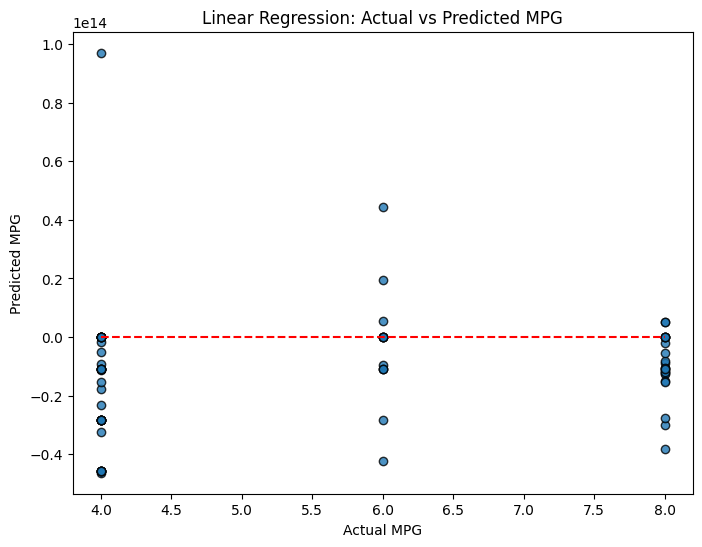

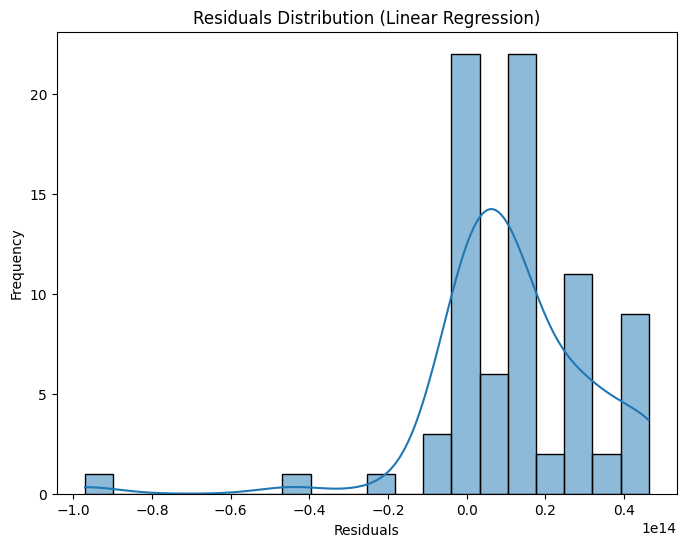

In [23]:
# Train a Linear Regression model on scaled data (e.g., StandardScaler)
scaled_X_train, scaled_X_test = scaled_data["StandardScaler"]
linear_model = LinearRegression()
linear_model.fit(scaled_X_train, y_train)
y_pred = linear_model.predict(scaled_X_test)

# Scatter plot of Actual vs Predicted MPG
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.8, edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Linear Regression: Actual vs Predicted MPG")
plt.xlabel("Actual MPG")
plt.ylabel("Predicted MPG")
plt.show()

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=20)
plt.title("Residuals Distribution (Linear Regression)")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()


### Neural Network:
1. **Training Loss Curve**: The loss curve shows how the model's error decreases with each epoch. A decreasing curve indicates effective learning.
2. **Scatter Plot**: The scatter plot highlights the model's accuracy in predicting MPG values. Neural networks may perform better on complex relationships.
3. **Residual Distribution**: The residuals for the neural network are analyzed to evaluate bias or variance issues.


C:\Users\sabih.rehman\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/stepWARNING:tensorflow:6 out of the last 9 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x0000026A080DD040> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


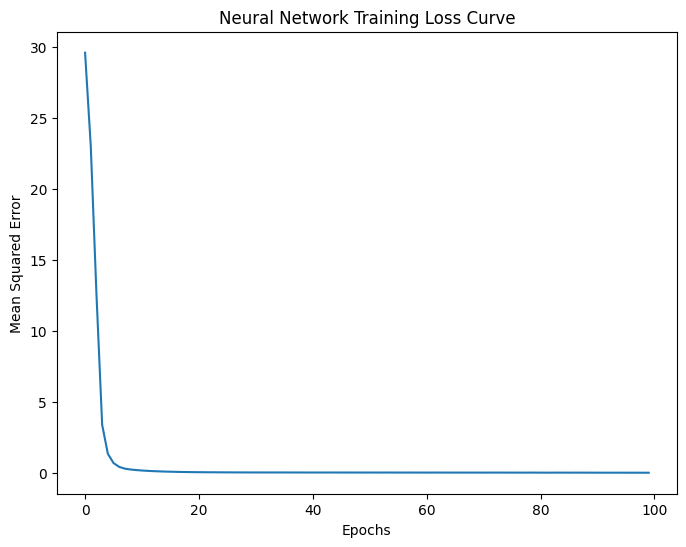

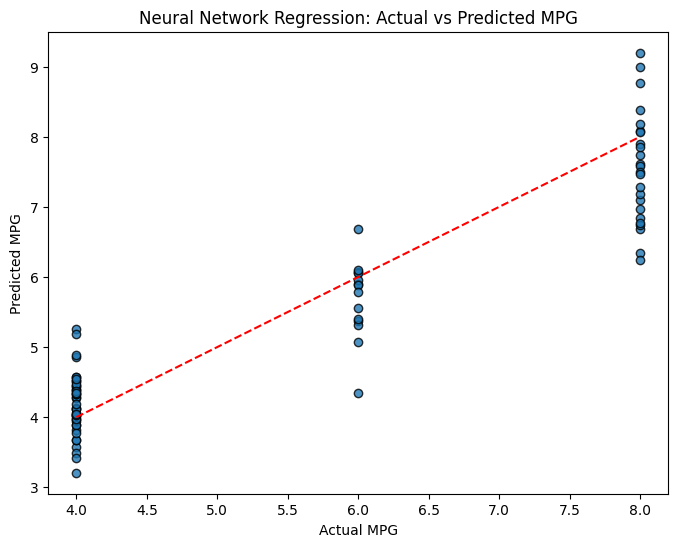

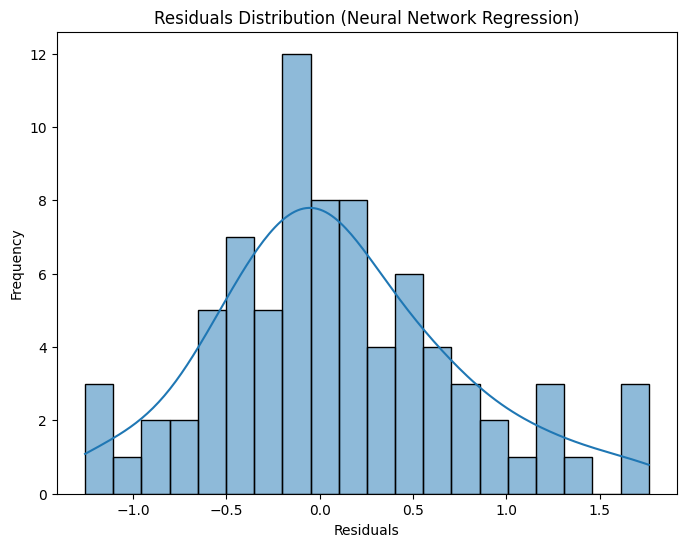

In [24]:
# Train a Neural Network model on scaled data (e.g., MinMaxScaler)
scaled_X_train, scaled_X_test = scaled_data["MinMaxScaler"]
nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(scaled_X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])
nn_model.compile(optimizer='adam', loss='mse')
history = nn_model.fit(scaled_X_train, y_train, epochs=100, verbose=0, batch_size=16)

# Predictions
y_pred_nn = nn_model.predict(scaled_X_test).flatten()

# Loss curve
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'])
plt.title("Neural Network Training Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.show()

# Scatter plot of Actual vs Predicted MPG
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_nn, alpha=0.8, edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Neural Network Regression: Actual vs Predicted MPG")
plt.xlabel("Actual MPG")
plt.ylabel("Predicted MPG")
plt.show()

# Residual plot
residuals_nn = y_test - y_pred_nn
plt.figure(figsize=(8, 6))
sns.histplot(residuals_nn, kde=True, bins=20)
plt.title("Residuals Distribution (Neural Network Regression)")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()


### Observations:
- Feature scaling significantly improves the performance of both models.
- The neural network captures complex relationships better than linear regression, as evidenced by its smaller residuals and higher R² score.

# Conclusion: Fuel Efficiency Prediction with Regression Models

## Key Takeaways

1. **Data Exploration:**
   - The pairwise relationships and correlation analysis revealed meaningful insights into feature dependencies.
   - Features like `Weight` and `Displacement` strongly influence `MPG`, while others like `Acceleration` have weaker impacts.

2. **Impact of Feature Scaling:**
   - Scaling significantly improved model performance by bringing features to a comparable range.
   - MinMax scaling was particularly beneficial for the Neural Network model, ensuring better convergence during training.

3. **Model Evaluation:**
   - **Linear Regression:**
     - Performed well with both raw and scaled data, but scaled data improved metrics like MSE and R².
   - **Neural Network Regression:**
     - Outperformed linear regression, especially with scaled data, by capturing complex non-linear relationships between features and the target variable.

4. **Scaling Insights:**
   - Feature scaling is a crucial preprocessing step for models sensitive to feature magnitudes, such as Neural Networks.
   - The choice of scaling method (e.g., MinMaxScaler or StandardScaler) can further optimize model performance.

## Final Thoughts
- Regression models are powerful tools for predicting car fuel efficiency, with neural networks excelling in scenarios with complex relationships.
- Scaling techniques not only enhance performance but also prevent dominance by features with larger ranges.
- Future work could explore additional scaling methods, feature engineering, and other advanced regression algorithms like Gradient Boosting or Support Vector Regression (SVR).
